In [1]:
import pandas as pd
import numpy as np
import config
from config import gkey

In [2]:
df=pd.read_csv('../csv/la_rest_types.csv', index_col=False)

In [3]:
# df.sample()
df.head(2)


,id,name,phone,address,category_alias,category_title,rating,review_count,lat,lon,zipcodes
0,__4rPIbNWudQVuoaRs2MuQ,Best Shawarma,1.818551e+10,"602 W Glenoaks Blvd Glendale, CA 91202","mideastern, bbq, armenian,",Middle Eastern,4.0,349,34.159455,-118.267173,91202
1,__4rPIbNWudQVuoaRs2MuQ,Best Shawarma,1.818551e+10,"602 W Glenoaks Blvd Glendale, CA 91202","mideastern, bbq, armenian,",Barbeque,4.0,349,34.159455,-118.267173,91202


In [4]:
df.zipcodes.str.startswith('9')

0        True
1        True
2        True
3        True
4        True
         ... 
61420    True
61421    True
61422    True
61423    True
61424    True
Name: zipcodes, Length: 61425, dtype: bool

In [5]:
df=df[df.zipcodes.str.startswith('9')]

In [6]:
# df.isnull()

In [7]:
df['category_title'].replace(' ', np.nan, inplace=True)

In [8]:
# df.isnull()

In [9]:
df.dropna(inplace=True)

In [10]:
df.reset_index(drop=True)
df.sample()

,id,name,phone,address,category_alias,category_title,rating,review_count,lat,lon,zipcodes
38274,OCO1IXkppXtDW-4DZoIdpQ,Tree of Wishes,1.323297e+10,"7469 Melrose Ave Los Angeles, CA 90046","mideastern, mediterranean, newamerican,",Mediterranean,4.5,3,34.083839,-118.352776,90046


In [11]:
# df.isnull()

In [12]:
df['rating'].value_counts()

4.0    12859
3.5     7679
4.5     7602
3.0     3792
2.5     2204
5.0     2049
2.0     1910
1.5      798
1.0      203
Name: rating, dtype: int64

In [13]:
# df['category_title'].value_counts(normalize=True)
df['rating'].value_counts(bins=3)

(3.667, 5.0]      22510
(2.333, 3.667]    13675
(0.995, 2.333]     2911
Name: rating, dtype: int64

In [14]:
import matplotlib

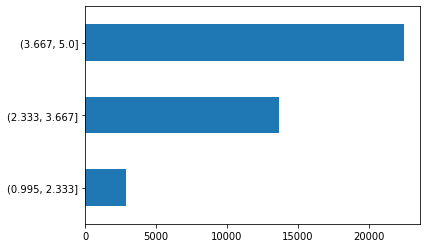

In [15]:
binplt=df.rating.value_counts(bins=3).sort_values().plot(kind = 'barh')


In [16]:
binplt.figure.savefig('plots/bin_plot.png')

In [17]:
cat_desc=df['category_title'].describe()

#cat_desc.value_counts()

In [18]:
 %matplotlib inline

In [19]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [20]:
desc=df.describe()
desc

,phone,rating,review_count,lat,lon
count,3.909600e+04,39096.000000,39096.000000,39096.000000,39096.000000
mean,1.455050e+10,3.705558,335.203857,33.978932,-118.256115
std,1.958447e+09,0.810553,550.094097,0.123445,0.175657
min,1.201844e+10,1.000000,1.000000,33.167953,-122.636364
25%,1.310559e+10,3.500000,48.000000,33.880870,-118.368680
50%,1.323753e+10,4.000000,155.000000,34.008113,-118.268303
75%,1.562983e+10,4.000000,406.000000,34.063753,-118.140630
max,1.951897e+10,5.000000,16955.000000,37.895588,-117.225868


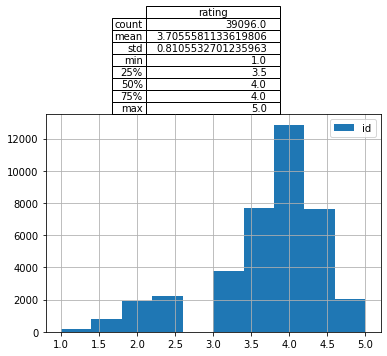

In [21]:
fig, axes = plt.subplots(1,1)
axes = df['rating'].hist()

plt.legend(df.columns)
dfsummary = pd.DataFrame(df['rating'].describe())

plt.table(cellText=dfsummary.values,
      colWidths = [0.4]*2,
      rowLabels=dfsummary.index,
      colLabels=dfsummary.columns,
      cellLoc = 'right', rowLoc = 'right',
      loc='top')

plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1025e908d0>,
      dtype=object)

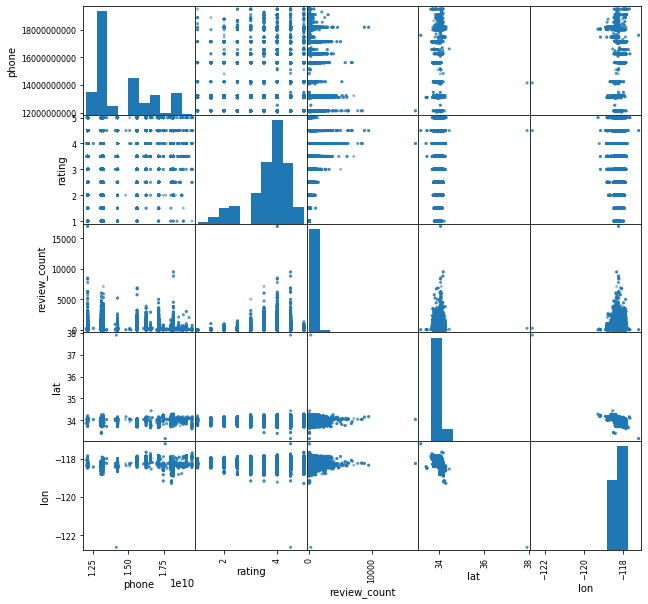

In [22]:
scatter_matrix(df, figsize=(10,10))

In [23]:
desc.groupby('rating')['review_count'].mean()

rating
0.810553          550.094097
1.000000            1.000000
3.500000           48.000000
3.705558          335.203857
4.000000          280.500000
5.000000        16955.000000
39096.000000    39096.000000
Name: review_count, dtype: float64

In [24]:
desc.groupby('rating')['review_count'].mean()

rating
0.810553          550.094097
1.000000            1.000000
3.500000           48.000000
3.705558          335.203857
4.000000          280.500000
5.000000        16955.000000
39096.000000    39096.000000
Name: review_count, dtype: float64

In [25]:
# df[df['rating']> 2.5].groupby('address')['rating']

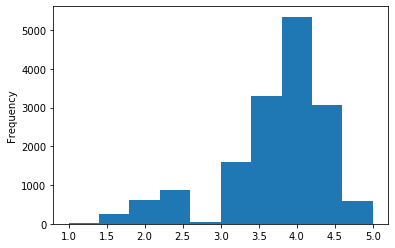

In [26]:
gr_zip = df.groupby(['zipcodes', 'review_count'])['rating'].median().reset_index()

hist=gr_zip['rating'].plot(kind='hist')
# gr_zip=gr_zip.min()




In [27]:
hist.figure.savefig('plots/hist.png')

In [28]:
df.groupby('category_title').rating.apply(lambda x: len(x[x>2.5])/len(x) )

category_title
 Acai Bowls                0.973684
 African                   1.000000
 American (New)            0.965443
 American (Traditional)    0.863576
 Amusement Parks           0.500000
                             ...   
Waffles                    1.000000
Wine Bars                  1.000000
Wine Tasting Room          1.000000
Wineries                   1.000000
Wraps                      0.500000
Name: rating, Length: 494, dtype: float64

In [29]:
df.sample()

,id,name,phone,address,category_alias,category_title,rating,review_count,lat,lon,zipcodes
38128,oA0V9OOiuKSyF80j2tyF-A,Shades of Curry,1.424832e+10,"11819 Wilshire Blvd Ste 207 Los Angeles, CA ...","indpak,",Indian,4.0,16,34.048099,-118.46312,90025


In [30]:
means = df.groupby('zipcodes').mean()['rating']
means
# medians = clean_study_data_complete.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
# variances = clean_study_data_complete.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
# sds = clean_study_data_complete.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
# sems = clean_study_data_complete.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
# summary_table = pd.DataFrame({"Mean Tumor Volume":means,
#                               "Median Tumor Volume":medians,
#                               "Tumor Volume Variance":variances,
#                               "Tumor Volume Std. Dev.":sds,
#                               "Tumor Volume Std. Err.":sems})

zipcodes
90000    4.000000
90001    3.661765
90002    3.097222
90003    3.218254
90004    3.814947
           ...   
93453    4.000000
93955    1.500000
94703    5.000000
94970    4.500000
95113    3.000000
Name: rating, Length: 336, dtype: float64

In [31]:
revCount = df.groupby('zipcodes').sum()['review_count']
revCount


zipcodes
90000     1753
90001     5867
90002     1872
90003     5178
90004    71718
         ...  
93453      706
93955       48
94703        1
94970      520
95113     2766
Name: review_count, Length: 336, dtype: int64

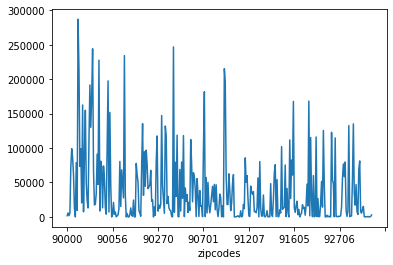

In [32]:
revCount.plot(kind='line')

In [33]:
# %%bash
# pip install seaborn

In [34]:
means = df.groupby('zipcodes').mean()['rating']
means

zipcodes
90000    4.000000
90001    3.661765
90002    3.097222
90003    3.218254
90004    3.814947
           ...   
93453    4.000000
93955    1.500000
94703    5.000000
94970    4.500000
95113    3.000000
Name: rating, Length: 336, dtype: float64

In [35]:
total_count = df.groupby('zipcodes').size()
total_count

zipcodes
90000      5
90001    204
90002     36
90003    126
90004    281
        ... 
93453      2
93955      2
94703      1
94970      2
95113      3
Length: 336, dtype: int64

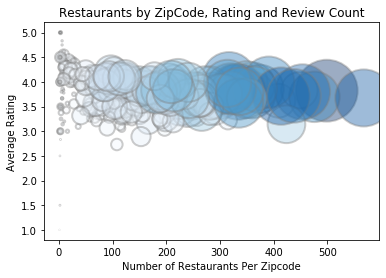

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
 
# create data
x = total_count
y = means
z = revCount
# z=z*z
# z=z.sum()

# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z/75, c=z, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
 
# Add titles (main and on axis)
plt.xlabel("Number of Restaurants Per Zipcode")
plt.ylabel("Average Rating")
plt.title("Restaurants by ZipCode, Rating and Review Count")
 
plt.show()

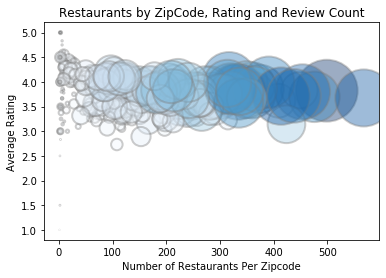

In [37]:
# create data
x = total_count
y = means
z = revCount
# z=z*z
# z=z.sum()

# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z/75, c=z, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
 
# Add titles (main and on axis)
plt.xlabel("Number of Restaurants Per Zipcode")
plt.ylabel("Average Rating")
plt.title("Restaurants by ZipCode, Rating and Review Count")
plt.savefig('plots/bubble_plot.png')
plt.show()



In [38]:
g = df.groupby('zipcodes')
rest_zips = [name for name,unused_df in g]
# rest_zips

In [39]:
# rest_zip = df['zipcodes'].unique()
# rest_zip

In [40]:
import gmaps


# Access maps with unique API key
gmaps.configure(api_key=gkey)

In [41]:
# # Customize the size of the figure
# figure_layout = {
#     'width': '400px',
#     'height': '300px',
#     'border': '1px solid black',
#     'padding': '1px',
#     'margin': '0 auto 0 auto'
# }
# fig = gmaps.figure(layout=figure_layout)

In [42]:
#datframe for all types of food
aT=pd.read_csv('../csv/LA_rest_yelp_no_dupes.csv')
aT.sample()

,id,name,phone,address,category_alias,category_title,rating,review_count,lat,lon
19773,ZTz2BY9zFqWYohxXI7kAbA,Cafe Cancun Mexican Food,1.310645e+10,"909 W Manchester Blvd Inglewood, CA 90301","mexican, diners, breakfast_brunch,","Mexican, Diners, Breakfast & Brunch,",4.0,107,33.961108,-118.372189


In [43]:
zipcodes = list()

for item in aT['address']:
    zipcode = item.split()[-1]
    zipcodes.append(zipcode)

aT['zipcodes'] = zipcodes
aT = pd.DataFrame(aT)
aT.sample()

,id,name,phone,address,category_alias,category_title,rating,review_count,lat,lon,zipcodes
467,0CCBFL74LoxPLy-VH2HI8Q,The Blue Star,1.213627e+10,"2200 E 15th St Los Angeles, CA 90021","newamerican, breakfast_brunch, salad,","American (New), Breakfast & Brunch, Salad,",4.0,157,34.02173,-118.23266,90021


In [44]:
list(aT[aT["zipcodes"]=='Kingdom']['address'])

['Suite 131  735 S Figueroa Street  Los Angeles 90017  United Kingdom',
 '243 Castle La West  Bournemouth BH8 9TG  United Kingdom',
 '181 Thornley La South  Stockport SK5 6QG  United Kingdom']

In [45]:
# list(aT[aT["zipcodes"]=='CA']['address'])

In [46]:
aT=aT[aT.zipcodes.str.startswith('9')]
aT.sample()

,id,name,phone,address,category_alias,category_title,rating,review_count,lat,lon,zipcodes
16651,UWD9F8hm6kjELGNxrRqceQ,Tacos Gavilan,1.323771e+10,"4406 Florence Ave Bell, CA 90201","mexican,","Mexican,",4.0,101,33.970218,-118.188862,90201


In [47]:
aT=aT[aT["review_count"]>=100]

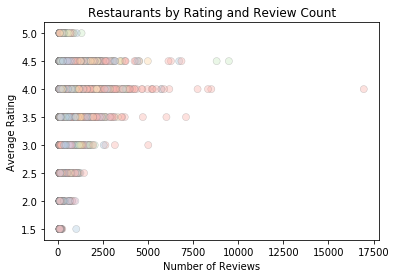

In [48]:
x = aT["review_count"]
y = aT["rating"]
z = aT.zipcodes.astype(int)
# z=z*z
# z=z.sum()

# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=50, c=z, cmap="Pastel1", alpha=0.4, edgecolors="grey", linewidth=.5)
 
# Add titles (main and on axis)
plt.xlabel("Number of Reviews")
plt.ylabel("Average Rating")
plt.title("Restaurants by Rating and Review Count")
plt.savefig('plots/scat_plot.png')
plt.show()

In [49]:
aT[aT["review_count"]>=15000]

,id,name,phone,address,category_alias,category_title,rating,review_count,lat,lon,zipcodes
15773,TkFEKhsCixPWlShULKvMdQ,Bottega Louie,1.213802e+10,"700 S Grand Ave Los Angeles, CA 90017","italian, bakeries, breakfast_brunch,","Italian, Bakeries, Breakfast & Brunch,",4.0,16955,34.04693,-118.256601,90017


In [50]:
aT[aT["zipcodes"]=='90017'].mean()

phone           1.217504e+10
rating          3.698795e+00
review_count    7.163614e+02
lat             3.404958e+01
lon            -1.182615e+02
zipcodes                 inf
dtype: float64

In [51]:
aT.describe()

,phone,rating,review_count,lat,lon
count,1.064200e+04,10741.000000,10741.000000,10741.000000,10741.000000
mean,1.483958e+10,3.821758,503.393259,33.981854,-118.253166
std,2.036202e+09,0.579965,598.806651,0.133527,0.193931
min,1.201844e+10,1.500000,100.000000,33.662399,-122.636364
25%,1.310560e+10,3.500000,179.000000,33.870215,-118.383880
50%,1.424278e+10,4.000000,316.000000,34.017345,-118.280314
75%,1.626965e+10,4.000000,597.000000,34.076020,-118.113167
max,1.951456e+10,5.000000,16955.000000,37.895588,-117.750724


In [52]:
badR=aT[(aT["review_count"]>=500) & (aT["rating"]== 1.5)]

In [53]:
# Store latitude and longitude in locations
locations = badR[["lat", "lon"]]


# Fill NaN values and convert to float
rating = badR["rating"].astype(float)




In [54]:
locations

,lat,lon
8855,33.847007,-118.262301


In [55]:
# Plot Heatmap
fig = gmaps.figure(center=(33.847007,-118.262301), tilt=45, zoom_level=12,)


# Assign the marker layer to a variable
markers = gmaps.marker_layer(locations, info_box_content='Buffalo Wild Wings' + '<br>' +' Rating of 1.5!')
# Add the layer to the map
fig.add_layer(markers)
fig

# Create heat layer
# heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
#                                  dissipating=False, max_intensity=10,
#                                  point_radius=1)

# heat_layer = gmaps.heatmap_layer(locations, weights=rating-.5, 
#                                  dissipating=False, max_intensity=1.5,
#                                  point_radius = .0008)

# # Add layer
# fig.add_layer(heat_layer)

# # Display figure
# fig

Figure(layout=FigureLayout(height='420px'))

In [56]:
bestR=aT[aT["review_count"]>=15000]
bestR

,id,name,phone,address,category_alias,category_title,rating,review_count,lat,lon,zipcodes
15773,TkFEKhsCixPWlShULKvMdQ,Bottega Louie,1.213802e+10,"700 S Grand Ave Los Angeles, CA 90017","italian, bakeries, breakfast_brunch,","Italian, Bakeries, Breakfast & Brunch,",4.0,16955,34.04693,-118.256601,90017


In [57]:
# Store latitude and longitude in locations
locations = bestR[["lat", "lon"]]


# Fill NaN values and convert to float
rating = bestR["rating"].astype(float)




In [58]:
locations

,lat,lon
15773,34.04693,-118.256601


In [59]:
# Plot Heatmap
fig = gmaps.figure(center=(34.04693,-118.256601), tilt=45, zoom_level=12,)


# Assign the marker layer to a variable
markers = gmaps.marker_layer(locations, info_box_content='Bottega Louie' + '<br>' +' 17,000 Reviews!')
# Add the layer to the map
fig.add_layer(markers)
fig

# Create heat layer
# heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
#                                  dissipating=False, max_intensity=10,
#                                  point_radius=1)

# heat_layer = gmaps.heatmap_layer(locations, weights=rating-.5, 
#                                  dissipating=False, max_intensity=1.5,
#                                  point_radius = .0008)

# # Add layer
# fig.add_layer(heat_layer)

# # Display figure
# fig

Figure(layout=FigureLayout(height='420px'))

In [60]:
mapdf=aT[(aT["zipcodes"]=='90017') & (aT["rating"]>= 3.5)]


In [61]:
lat=list(mapdf['lat'])
lon=list(mapdf['lon'])

In [62]:
# coordinates = [
#     (40.71, -74.00),]

In [63]:
zip(lat, lon)

In [64]:
coordinates = [x for x in zip(lat, lon)]

In [65]:
# # Customize the size of the figure
# figure_layout = {
#     'width': '400px',
#     'height': '300px',
#     'border': '1px solid black',
#     'padding': '1px',
#     'margin': '0 auto 0 auto'
# }
# fig = gmaps.figure(layout=figure_layout)

In [66]:
#what other restaurants are near the most reviewed?


In [67]:
# Customize the size of the figure
figure_layout = {
    'width': '700px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
rest_name=mapdf['name'].tolist()
fig = gmaps.figure(layout=figure_layout)
# Assign the marker layer to a variable
info_box_content=[f"Restaurant name: {name}" for name in rest_name]
markers = gmaps.marker_layer(coordinates, info_box_content=info_box_content )
heat_layer = gmaps.heatmap_layer(coordinates, weights=mapdf['rating']-3.5, 
                                 dissipating=False, max_intensity=1.5,
                                 point_radius = .0008)
# Add the layer to the map
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto 0 auto', padding='1px', wi…